# PREDICTING FUTURE PRODUCT PRICES USING FACEBOOK PROPHET 



- You must install fbprophet package as follows: 
     pip install fbprophet
     
- If you encounter an error, try: 
    conda install -c conda-forge fbprophet



In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet


In [3]:
# dataframes creation for both training and testing datasets 
df = pd.read_csv("avocado.csv")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB



- Date: The date of the observation
- AveragePrice: the average price of a single avocado
- type: conventional or organic
- year: the year
- Region: the city or region of the observation
- Total Volume: Total number of avocados sold
- 4046: Total number of avocados with PLU 4046 sold
- 4225: Total number of avocados with PLU 4225 sold
- 4770: Total number of avocados with PLU 4770 sold

In [33]:
# Let's view the head of the training dataset
df.head()
df.tail(5)

Unnamed: 0        Date  AveragePrice  Total Volume        4046  \
8574            0  2018-03-25          1.36     908202.13   142681.06   
9018            0  2018-03-25          0.70    9010588.32  3999735.71   
18141           0  2018-03-25          1.42     163496.70    29253.30   
17673           0  2018-03-25          1.70     190257.38    29644.09   
8814            0  2018-03-25          1.34    1774776.77    63905.98   

            4225       4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
8574   463136.28  174975.75   127409.04   103579.41    22467.04      1362.59   
9018   966589.50   30130.82  4014132.29  3398569.92   546409.74     69152.63   
18141    5080.04       0.00   129163.36   109052.26    20111.10         0.00   
17673   70982.10       0.00    89631.19    89424.11      207.08         0.00   
8814   908653.71     843.45   801373.63   774634.09    23833.93      2905.61   

               type  year        region  
8574   conventional  2018       Chicago  
9018   conventional  2018  SouthCentral  
18141       organic  2018  SouthCentral  
17673       organic  2018    California  
8814   conventional  2018       NewYork

In [6]:
# Let's view the last elements in the training dataset
df.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [7]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# TASK #3: EXPLORE DATASET  

In [8]:
df = df.sort_values("Date")

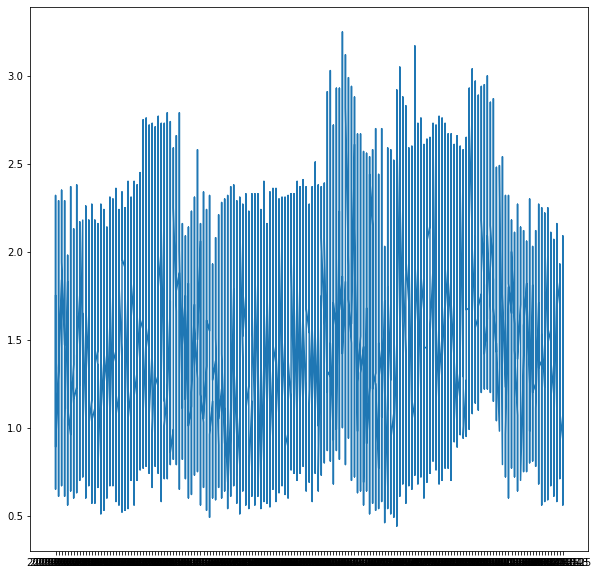

In [13]:
# Plot date and average price 
plt.figure(figsize=(10,10))
plt.plot(df["Date"], df["AveragePrice"])


C:\ProgramData\Anaconda3\envs\acamica\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

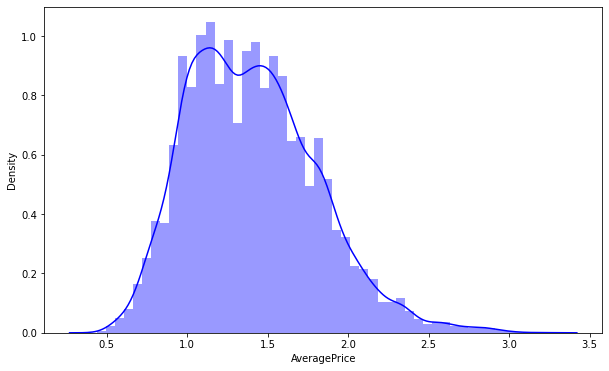

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(df.AveragePrice,color="b")

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

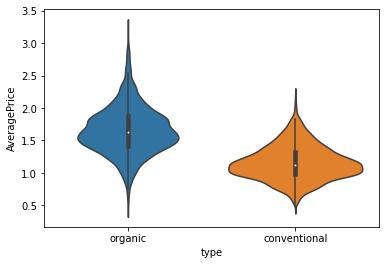

In [16]:
sns.violinplot(y = "AveragePrice", x="type", data=df)

In [ ]:
# Plot a violin plot of the average price vs. avocado type


In [ ]:
# Bar Chart to indicate the number of regions 

sns.set(font_scale=0.7) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 45)


In [ ]:
# Bar Chart to indicate the count in every year
sns.set(font_scale=1.5) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = avocado_df)
plt.xticks(rotation = 45)

C:\ProgramData\Anaconda3\envs\acamica\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


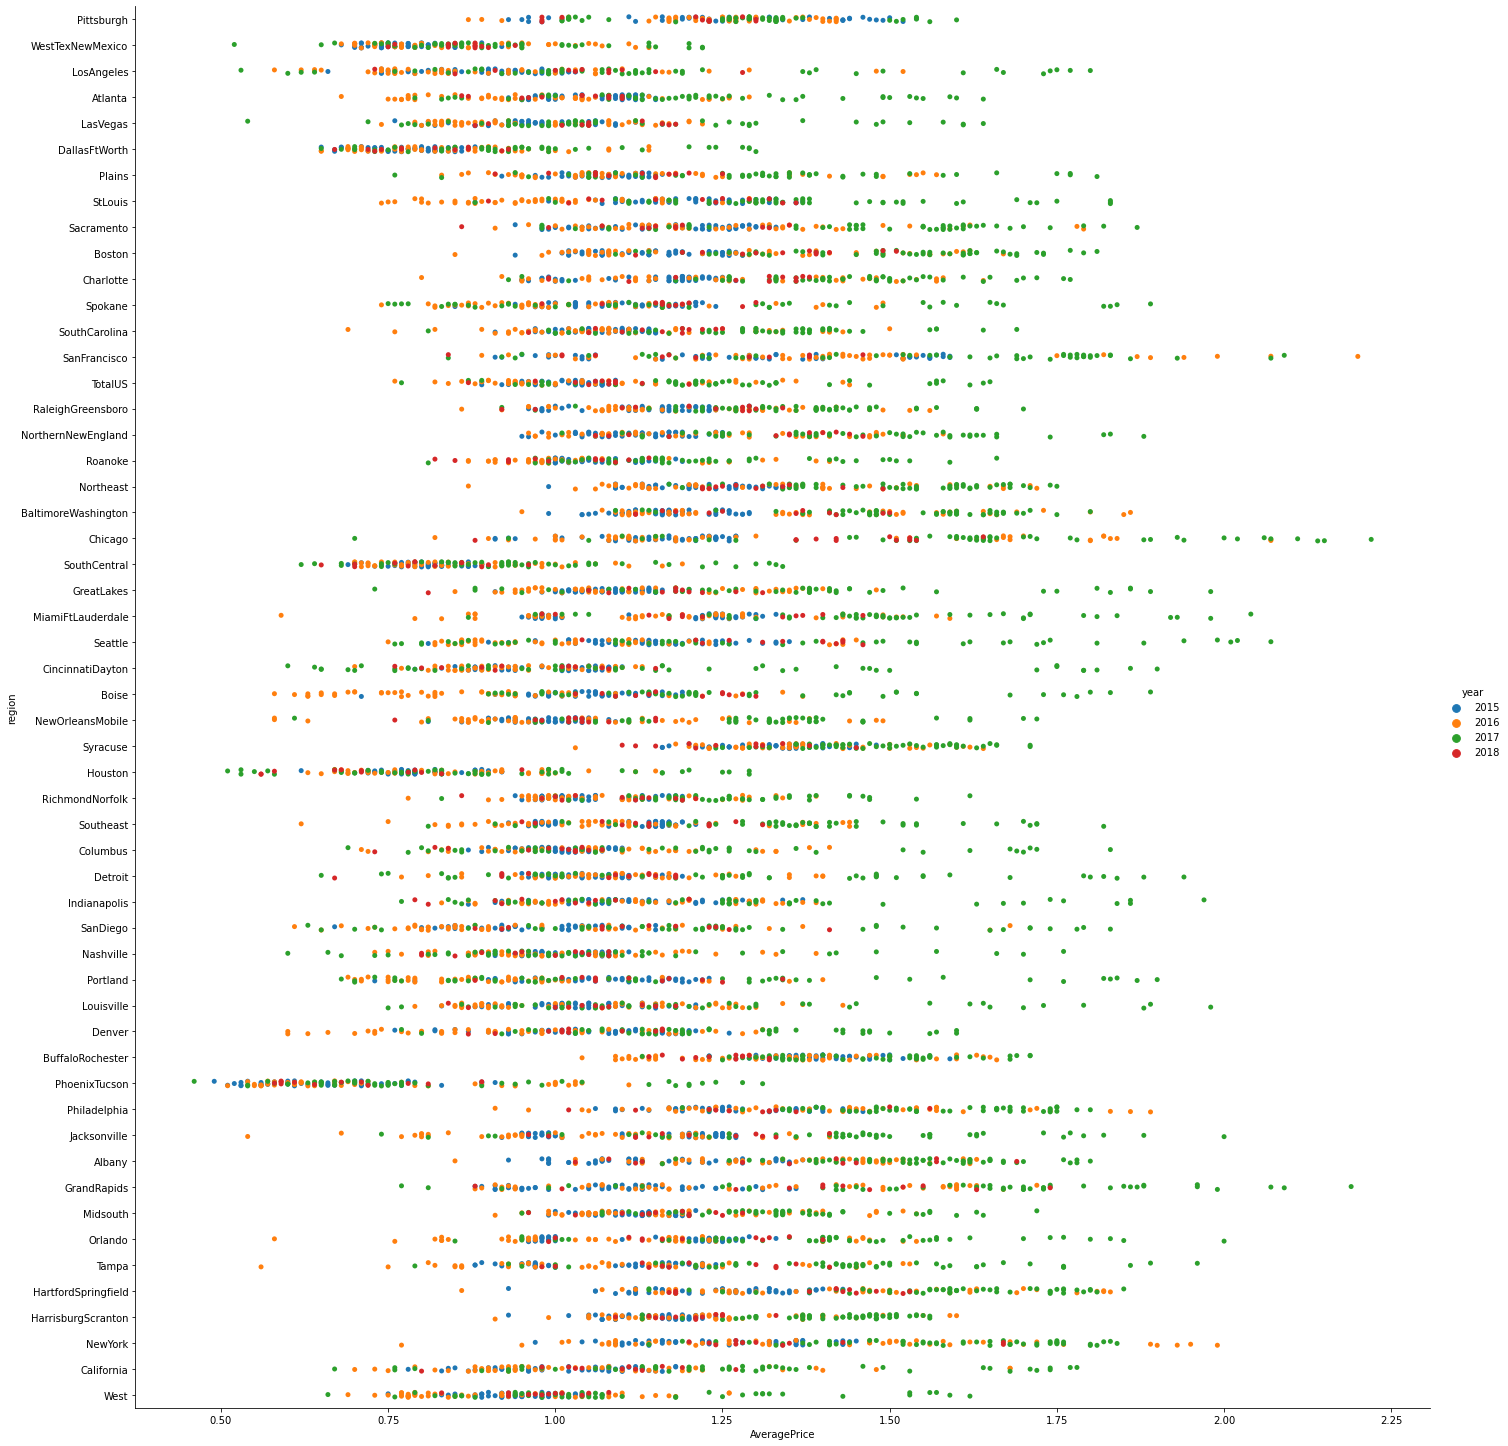

In [23]:
 # plot the avocado prices vs. regions for conventional avocados
coventional = sns.catplot("AveragePrice", "region", data = df[df["type"]=="conventional"],hue="year",height=20)

In [ ]:
  # plot the avocado prices vs. regions for organic avocados


In [24]:
prophet_df = df[["Date", "AveragePrice"]]

In [25]:
prophet_df = prophet_df.rename(columns = {"Date":"ds", "AveragePrice":"y"})

In [26]:
m = Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)


In [30]:
forecast

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2015-01-04  1.496718    0.901269    1.857286     1.496718     1.496718   
1   2015-01-11  1.491718    0.930509    1.864551     1.491718     1.491718   
2   2015-01-18  1.486719    0.855919    1.855783     1.486719     1.486719   
3   2015-01-25  1.481720    0.865715    1.840259     1.481720     1.481720   
4   2015-02-01  1.476721    0.823503    1.805187     1.476721     1.476721   
..         ...       ...         ...         ...          ...          ...   
529 2019-03-21  1.164538    0.552984    1.594542     0.970898     1.351535   
530 2019-03-22  1.163813    0.567416    1.590181     0.969376     1.351890   
531 2019-03-23  1.163088    0.557168    1.669098     0.967863     1.352272   
532 2019-03-24  1.162363    0.537190    1.587708     0.966284     1.352465   
533 2019-03-25  1.161639    0.587149    1.616301     0.964616     1.352803   

     additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
0         -0.112798             -0.112798             -0.112798 -0.112798   
1         -0.104291             -0.104291             -0.104291 -0.104291   
2         -0.103991             -0.103991             -0.103991 -0.103991   
3         -0.123042             -0.123042             -0.123042 -0.123042   
4         -0.151522             -0.151522             -0.151522 -0.151522   
..              ...                   ...                   ...       ...   
529       -0.086418             -0.086418             -0.086418 -0.086418   
530       -0.084748             -0.084748             -0.084748 -0.084748   
531       -0.082805             -0.082805             -0.082805 -0.082805   
532       -0.080608             -0.080608             -0.080608 -0.080608   
533       -0.078184             -0.078184             -0.078184 -0.078184   

     yearly_lower  yearly_upper  multiplicative_terms  \
0       -0.112798     -0.112798                   0.0   
1       -0.104291     -0.104291                   0.0   
2       -0.103991     -0.103991                   0.0   
3       -0.123042     -0.123042                   0.0   
4       -0.151522     -0.151522                   0.0   
..            ...           ...                   ...   
529     -0.086418     -0.086418                   0.0   
530     -0.084748     -0.084748                   0.0   
531     -0.082805     -0.082805                   0.0   
532     -0.080608     -0.080608                   0.0   
533     -0.078184     -0.078184                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                           0.0                         0.0  1.383920  
1                           0.0                         0.0  1.387427  
2                           0.0                         0.0  1.382728  
3                           0.0                         0.0  1.358678  
4                           0.0                         0.0  1.325199  
..                          ...                         ...       ...  
529                         0.0                         0.0  1.078120  
530                         0.0                         0.0  1.079065  
531                         0.0                         0.0  1.080283  
532                         0.0                         0.0  1.081756  
533                         0.0                         0.0  1.083455  

[534 rows x 16 columns]

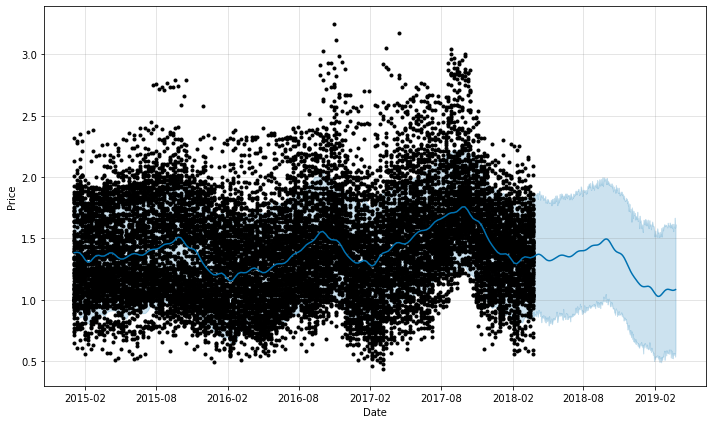

In [31]:
figure = m.plot(forecast, xlabel="Date", ylabel="Price")

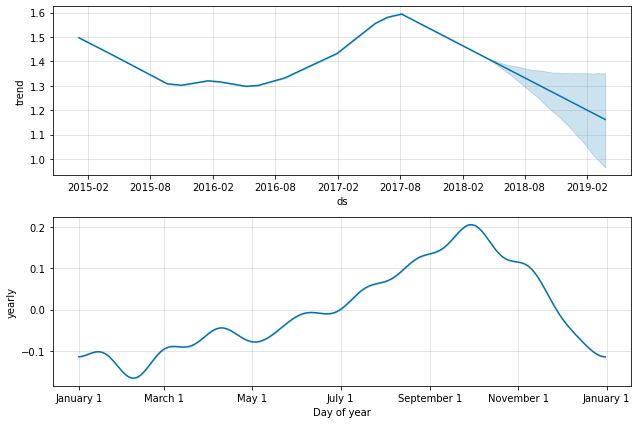

In [32]:
figure2 = m.plot_components(forecast)

In [ ]:
m = Prophet()
m.fit(avocado_df_sample)
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [ ]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

In [ ]:
figure3 = m.plot_components(forecast)

# GREAT JOB!